In [36]:
import pandas as pd

In [37]:
import numpy as np

In [38]:
from datetime import datetime

In [39]:
import matplotlib.pyplot as plt

In [287]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

In [288]:
import nltk
import string

In [310]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [289]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [290]:
data = pd.read_csv('/Users/djbetts/Desktop/top-25-cigars/cigar_aficionado.csv', usecols=['name','tasting_notes','score'])

In [291]:
df = data.copy()

In [292]:
df.columns

Index(['name', 'score', 'tasting_notes'], dtype='object')

In [293]:
df.shape

(20769, 3)

In [294]:
df.dropna(axis=0, inplace=True)

In [295]:
df.head()

,name,score,tasting_notes
0,BOLIVAR ROYAL CORONA,93,"This is an earthy, rich cigar with a lovely br..."
1,DAVIDOFF GRAN CRU NO. 2,89,An enticing cigar that keeps you coming back f...
2,ASHTON CORONA,86,This cigar is well-made and gives plenty of fl...
3,ASHTON MAGNUM,82,"This is a clean, very mild well-made cigar, wi..."
4,ARTURO FUENTE CHATEAU FUENTE SUN GROWN,86,"Finely constructed, A. Fuente's robusto has a ..."


In [296]:
X = df.tasting_notes
corpus = list(X)

In [297]:
corpus[0]

'This is an earthy, rich cigar with a lovely brown wrapper and dense spicy aromas. The flavors are mellow with a clean finish. '

In [298]:
y = df.score

In [299]:
from nltk.corpus import stopwords

In [300]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/djbetts/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [301]:
import nltk
from nltk.corpus import stopwords
s = stopwords.words('english')

In [306]:
#wordnet lemmatizer and lowercase words.
def wordnet_tokenize(doc):
    wordnet = WordNetLemmatizer()
    return  [wordnet.lemmatize(word) for word in word_tokenize(doc.lower())]
#split article and return quote

In [307]:
def punc_strip(doc):
    for char in word_tokenize(doc):
        if char in '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~—':
            doc = doc.replace(char, " ")
        if char == "’":
            doc = doc.replace(char, "")
    return doc

In [317]:
%%time
#create vectorizer

vectorizer = TfidfVectorizer(#input='content', 
#                 encoding='utf-8', 
#                 decode_error='strict', 
#                 strip_accents='ascii', 
#                 lowercase=True, 
                 preprocessor=punc_strip, 
                tokenizer=wordnet_tokenize, 
#                 analyzer='word', 
                stop_words='english',
#                 token_pattern='(?u)\b\w\w+\b', 
                 ngram_range=(1, 2), 
#                  max_df=0.9, 
                min_df=0.01, 
                 max_features=None, 
#                 vocabulary=None, 
#                 binary=False, 
#                 dtype=<class 'numpy.float64'>, 
#                 norm='l2', 
#                 use_idf=True, 
#                 smooth_idf=True, 
#                 sublinear_tf=False
)

CPU times: user 2.23 ms, sys: 927 µs, total: 3.15 ms
Wall time: 3.17 ms


In [318]:
X = vectorizer.fit_transform(corpus)

/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [319]:
print(len(vectorizer.get_feature_names()))

344


In [320]:
print(vectorizer.vocabulary_)

{'earthy': 100, 'rich': 250, 'cigar': 51, 'brown': 30, 'wrapper': 337, 'dense': 84, 'spicy': 278, 'aroma': 5, 'flavor': 123, 'mellow': 192, 'finish': 116, 'beautifully': 13, 'draw': 86, "'s": 0, 'smooth': 270, 'palate': 227, 'coffee': 62, 'character': 44, "draw 's": 87, 'well-made': 321, 'plenty': 240, 'light': 175, 'spiciness': 277, 'mild': 194, 'grassy': 139, 'well-made cigar': 322, 'robusto': 252, 'ha': 141, 'nice': 198, 'elegant': 105, 'texture': 291, 'soft': 271, 'sweet': 282, 'herbal': 153, 'burn': 31, 'little': 177, 'nutty': 213, 'like': 176, 'maduro': 183, 'dark': 78, 'solid': 272, 'construction': 69, 'lot': 180, 'peppery': 232, 'cigar ha': 55, 'nutty flavor': 214, 'long': 179, 'full-bodied': 131, 'aftertaste': 1, 'smoke': 267, 'spice': 276, 'nut': 210, 'cedar': 42, 'full-bodied cigar': 132, 'slightly': 265, 'creamy': 77, 'silky': 262, 'tobacco': 300, 'chocolate': 49, 'beautiful': 12, 'oily': 220, 'cream': 76, 'taste': 288, 'great': 140, 'medium-bodied': 189, 'roasted': 251, 'm

# min_df_plot

In [315]:
%%time
num_feat_min = []

min_df = np.linspace(0,0.01,15)

for val in min_df:
    vectorizer_plot = TfidfVectorizer(#preprocessor=punc_strip,
#                 tokenizer=wordnet_tokenize,
                stop_words='english',
            ngram_range=(1,2),
#                 max_df=0.95,
                 min_df=val,
                 max_features=None)
    
    vectorizer_plot.fit(corpus)
    
    features = vectorizer_plot.get_feature_names()
    stop_word = vectorizer_plot.get_stop_words()

    num_feat_min.append(len(features))

CPU times: user 9.2 s, sys: 201 ms, total: 9.4 s
Wall time: 9.42 s


CPU times: user 16.9 ms, sys: 2.04 ms, total: 18.9 ms
Wall time: 17.1 ms


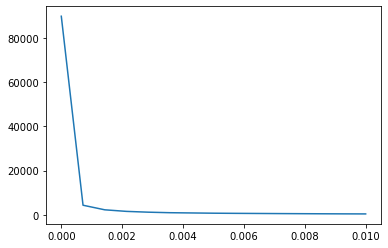

In [316]:
%%time
fig, ax = plt.subplots()
ax.plot(min_df, num_feat_min);

In [145]:
%%time
print(datetime.now())
distortions = []
K = range(1,30)
for k in K:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel = kmeansModel.fit(X)
    distortions.append(kmeansModel.inertia_)

2021-03-26 13:08:25.233996
CPU times: user 10min 3s, sys: 12.2 s, total: 10min 16s
Wall time: 1min 30s


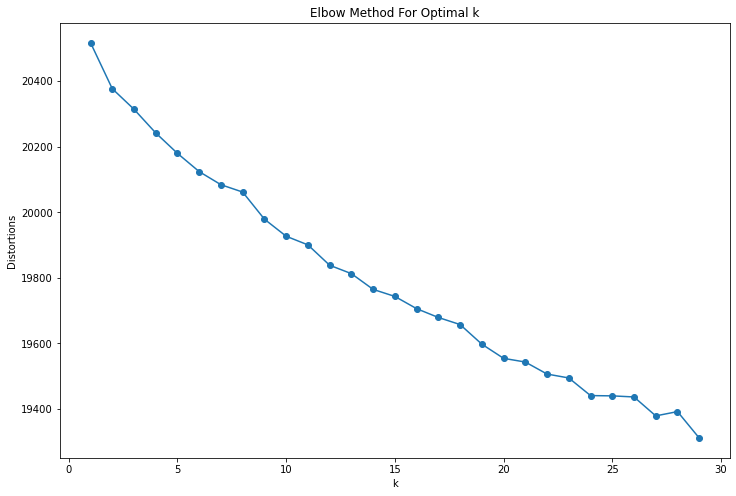

CPU times: user 607 ms, sys: 68.8 ms, total: 676 ms
Wall time: 235 ms


In [146]:
%%time
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(K, distortions, marker='o')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title("Elbow Method For Optimal k")
plt.show()

# linear regression

In [220]:
# from sklearn.pipeline import Pipeline, FeatureUnion
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC
# from sklearn.datasets import load_iris
# from sklearn.decomposition import PCA, TruncatedSVD
# from sklearn.feature_selection import SelectKBest

# X, y = X, y

# # This dataset is way too high-dimensional. Better do PCA:
# pca = TruncatedSVD(n_components=2)

# # Maybe some original features where good, too?
# selection = SelectKBest(k=1)

# # Build estimator from PCA and Univariate selection:

# combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

# # Use combined features to transform dataset:
# X_features = combined_features.fit(X, y).transform(X)
# print("Combined space has", X_features.shape[1], "features")

# svm = SVC(kernel="linear")

# # Do grid search over k, n_components and C:

# pipeline = Pipeline([("features", combined_features), ("svm", svm)])

# param_grid = dict(features__pca__n_components=[1, 2, 3],
#                   features__univ_select__k=[1, 2],
#                   svm__C=[0.1, 1, 10])

# grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, verbose=10)
# grid_search.fit(X, y)
# print(grid_search.best_estimator_)


In [231]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [247]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.6923018712421541

In [251]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [252]:

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)



LinearRegression()

In [253]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)


In [255]:
X_test.shape

(4145, 3079)

In [258]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [-1.19672234  1.97461333  3.69461296 ... -0.06961293  0.25158763
  1.94314927]
Mean squared error: 2.36
Coefficient of determination: 0.69
